#Image_Analysis Program

In [1]:
#Importing Packages
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Taking in the Image of Pandas
img_re='pandas.jpg'

In [3]:
#To read the image
bgr_img=cv2.imread(img_re)

In [4]:
print(bgr_img.shape) #Printing the RGB

(510, 1020, 3)


In [5]:
print(bgr_img.size) #Printing the Size of the Image

1560600


In [6]:
print(bgr_img.dtype) 

uint8


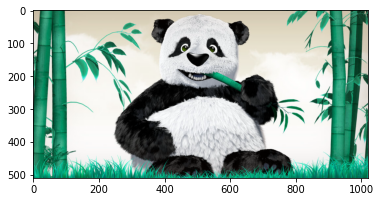

In [7]:
plt.imshow(bgr_img)

In [8]:
crop=bgr_img[0:500,200:800]
#crop=bgr_img( , 200:800)

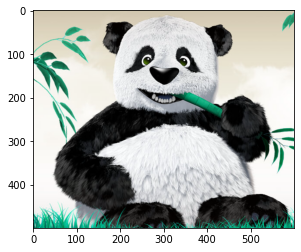

In [9]:
plt.imshow(crop)

In [10]:
print(crop.shape)

(500, 600, 3)


In [11]:
gray_img=cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY) #Coverting the image into BGR2GRAY

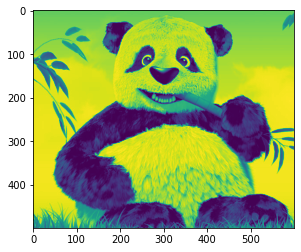

In [12]:
plt.imshow(gray_img)

In [13]:
#Normalizing the Image
gray_img=gray_img.astype("float32")/255 

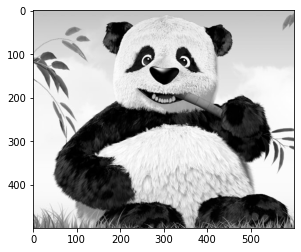

In [14]:
#Ploting it in GrayScale
plt.imshow(gray_img,cmap='gray')
plt.show()

## Selecting an inbuilt image from the cifar10 dataset

In [15]:
import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [16]:
from keras.datasets import cifar10 #Importing the Dataset

In [17]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [18]:
#Displaying the shape of xtrain
xtrain.shape

(50000, 32, 32, 3)

In [19]:
#Selecting the Random Image from the dataset
xtrain[25]

array([[[162, 164, 130],
        [164, 167, 128],
        [169, 171, 131],
        ...,
        [184, 176, 137],
        [190, 186, 146],
        [202, 198, 161]],

       [[153, 151, 119],
        [158, 156, 120],
        [164, 163, 124],
        ...,
        [178, 171, 131],
        [189, 184, 143],
        [201, 198, 158]],

       [[157, 151, 120],
        [161, 156, 121],
        [164, 160, 122],
        ...,
        [178, 170, 131],
        [190, 186, 142],
        [202, 199, 156]],

       ...,

       [[214, 205, 193],
        [213, 193, 181],
        [213, 185, 174],
        ...,
        [240, 207, 193],
        [241, 206, 194],
        [242, 209, 196]],

       [[218, 209, 198],
        [209, 188, 176],
        [208, 180, 169],
        ...,
        [232, 195, 182],
        [236, 196, 185],
        [239, 200, 187]],

       [[216, 204, 197],
        [207, 189, 178],
        [201, 174, 156],
        ...,
        [231, 192, 178],
        [233, 194, 181],
        [235, 198, 183]]

In [20]:
ytrain[0]

array([6], dtype=uint8)

In [21]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

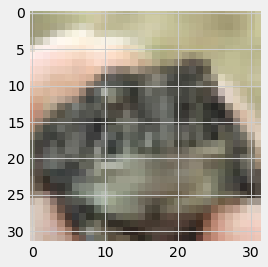

In [22]:
#Displaying the image which we trained.
img0=plt.imshow(xtrain[25])

In [23]:
#Printing the Class of the above image.
print('Image Class is: ',classification[ytrain[0][0]])

Image Class is:  frog


In [24]:
0,1,2,3,4,5,6,7,8,9 #one hot key encode xtrain[0]=6 =[0,0,0,0,0,0,1,0,0]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [25]:
ytrin_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [26]:
ytest_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
#normalize
xtrain=xtrain/255
xtest=xtest/255

In [28]:
xtrain

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [29]:
model=Sequential()

In [30]:
#Creating the CNN Model and assigning the Conv2D, Activation functions, Pooling, etc
#Create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(250,activation='relu'))

#add a layer
model.add(Dense(10,activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
#Fit the model with epochs of 10 to find or above.(Here used 10 epochs)
tr=model.fit(xtrain,ytrin_one_hot,batch_size=256,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.7339 - accuracy: 0.3538
Epoch 2/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.3657 - accuracy: 0.5046
Epoch 3/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.2061 - accuracy: 0.5712
Epoch 4/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1204 - accuracy: 0.6021
Epoch 5/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.0254 - accuracy: 0.6389
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.9668 - accuracy: 0.6615
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.9077 - accuracy: 0.6800
Epoch 8/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.8433 - accuracy: 0.6997
Epoch 9/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.7973 - accuracy: 0.7189
Epoch 10/10
50000/50000 [==============================

In [33]:
#If epochs are increased then Accuracy will increase and Loss will decrease.

In [34]:
#Evaluating the Model with the test data.
tr=model.evaluate(xtest,ytest_one_hot)

10000/10000 [==============================] - 5s 487us/step


In [35]:
print('Test loss:', tr[0])
print('Test accuracy:', tr[1])

Test loss: 0.9203958295822143
Test accuracy: 0.6866000294685364


In [36]:
#Test the model with Unknown image downloaded from internet
img=plt.imread('truck.jpg')

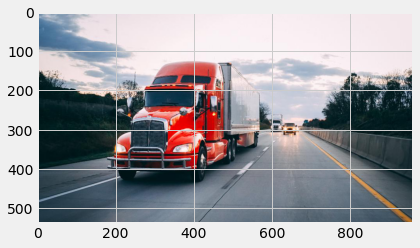

In [37]:
Img=plt.imshow(img)

In [38]:
from skimage import transform

In [39]:
resize=transform.resize(img,(32,32,3))

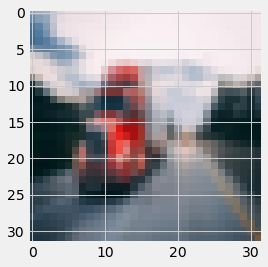

In [40]:
Img=plt.imshow(resize)

In [41]:
predictt=model.predict(np.array([resize]))
print(predictt) 

[[0.15335964 0.00768326 0.00938032 0.01022857 0.01232923 0.00532279
  0.00297106 0.01020146 0.01282937 0.7756943 ]]


In [42]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictt
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[9, 0, 8, 4, 3, 7, 2, 1, 5, 6]


In [43]:
#Printing the possible Class for the images.
for i in range(5):
    print(classification[list_index[i]])

truck
airplane
ship
deer
cat
